In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error
from matplotlib import pyplot as plt

from catboost import CatBoostRegressor
from category_encoders.m_estimate import MEstimateEncoder
from category_encoders.one_hot import OneHotEncoder
import sktools

In [2]:
df = pd.read_csv('data/stackoverflow.csv')

/Users/cmougan/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.drop(columns=['Respondent','Salary'])

In [4]:
cols = ['Country','Employment','FormalEducation','UndergradMajor','CompanySize','DevType','YearsCoding','LanguageWorkedWith','LanguageDesireNextYear','RaceEthnicity']

In [5]:
df = df.fillna(0)

In [6]:
df = df[['Country' ,'SalaryType','ConvertedSalary']]

In [7]:
X = df.drop(columns=['ConvertedSalary'])
y = df['ConvertedSalary']

In [8]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,random_state=0)

In [9]:
te = MEstimateEncoder()
pe = sktools.encoders.QuantileEncoder(quantile=0.5)
ohe = OneHotEncoder()

X_tr_ohe = ohe.fit_transform(X_tr)
X_tr_te = te.fit_transform(X_tr,y_tr)
X_tr_pe = pe.fit_transform(X_tr,y_tr)

In [27]:
dt = DecisionTreeRegressor(random_state=0,max_depth=7,ccp_alpha=0.1)

## One hot encoding

In [28]:
dt.fit(X_tr_ohe,y_tr)

DecisionTreeRegressor(ccp_alpha=0.1, max_depth=7, random_state=0)

In [29]:
print(mean_absolute_error(dt.predict(X_tr_ohe),y_tr))
print(mean_absolute_error(dt.predict(ohe.transform(X_te)),y_te))

67365.94719295068
67616.75614825227


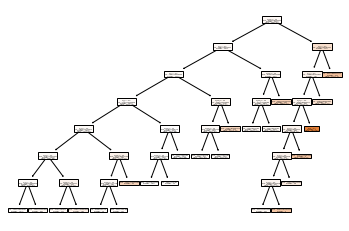

In [30]:
plt.figure()
plot_tree(dt, filled=True)
plt.savefig('tree_ohe.eps', format='eps')
plt.show()

## Target Encodings

In [31]:
dt.fit(X_tr_te,y_tr)

DecisionTreeRegressor(ccp_alpha=0.1, max_depth=7, random_state=0)

In [32]:
print(mean_absolute_error(dt.predict(X_tr_te),y_tr))
print(mean_absolute_error(dt.predict(te.transform(X_te)),y_te))

64605.50310648205
65566.31029132027


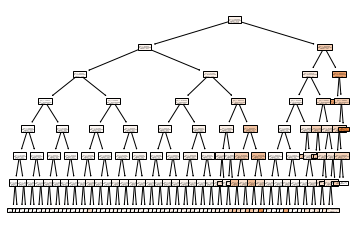

In [33]:
plt.figure()
plot_tree(dt, filled=True)
plt.savefig('tree_te.eps', format='eps')
plt.show()

## Quantile Encoding

In [34]:
dt.fit(X_tr_pe,y_tr)

DecisionTreeRegressor(ccp_alpha=0.1, max_depth=7, random_state=0)

In [35]:
print(mean_absolute_error(dt.predict(X_tr_pe),y_tr))
print(mean_absolute_error(dt.predict(pe.transform(X_te)),y_te))

64157.37785280608
64583.83037809212


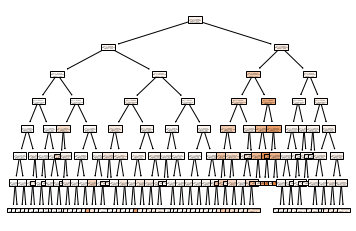

In [36]:
plt.figure()
plot_tree(dt, filled=True)
plt.show()